In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from TWA_Design_Tools import TWA_Design_Toolkit
from TWA_skrf_Toolkit import TWA_skrf_Toolkit as rftoolkit
import skrf as rf
from scipy.optimize import minimize

In [39]:
# Enter the physical parameters of the antenna 
num_straps = 9
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

# settings to create the rf toolkit object 
capz0 = 9.3506
antz0 = 30
freqs_for_fullant = np.arange(90,103, 1)#  np.array([96, 97]) # MHz
capfile = 'circ_model/S11_cap_90to102MHz_16cm_capbox_og_width_touse.csv'#'circ_model/S11_cap_81to111MHz.csv'#
antfile = 'circ_model/fixed_bigscan_90to102MHz.csv'#'circ_model/fixed_bigscan_90to102MHz.csv' #'circ_model/fixed_Smat_ant_96_and_97_deembed.csv'

myrfTWA = rftoolkit(num_straps=num_straps, f0=f0, k_par_max=k_par, capz0=capz0, 
                    antz0=antz0, freqs_for_fullant=freqs_for_fullant, capfile=capfile, antfile=antfile)

# add items to geometry
ar = 1.5e-2
d = 11e-2
s0 = 16e-2
wstrap = 8e-2
l = 15e-2
ts = 0.5e-2
tbox = 1e-2
h = .5e-2
t_cap_extend = 0.25e-2
wcap = wstrap + 2*t_cap_extend # 1 cm on either side
wcapbox = wcap + 2*h
tdiv = myrfTWA.geometry_dict['s_rez'] - 2*h - wcap 
dcap = ts + 2*t_cap_extend
dcapbox = dcap + 2*h
lcapbox = 10e-2
lcut = 6e-2
ldeembed = 5e-2
lfeed = 10e-2

myrfTWA.add_to_geometry('ar', ar)
myrfTWA.add_to_geometry('d', d)
myrfTWA.add_to_geometry('s0', s0)
myrfTWA.add_to_geometry('wstrap', wstrap)
myrfTWA.add_to_geometry('l', l)
myrfTWA.add_to_geometry('ts', ts)
myrfTWA.add_to_geometry('tbox', tbox)
myrfTWA.add_to_geometry('h', h)
myrfTWA.add_to_geometry('t_cap_extended', t_cap_extend)
myrfTWA.add_to_geometry('wcap', wcap)
myrfTWA.add_to_geometry('wcapbox', wcapbox)
myrfTWA.add_to_geometry('tdiv', tdiv)
myrfTWA.add_to_geometry('dcap', dcap)
myrfTWA.add_to_geometry('dcapbox', dcapbox)
myrfTWA.add_to_geometry('lcapbox', lcapbox)
myrfTWA.add_to_geometry('lcut', lcut)
myrfTWA.add_to_geometry('ldeembed', ldeembed)
myrfTWA.add_to_geometry('lfeed', lfeed)

myrfTWA.print_geometry()

k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582
num_straps:     9
s_rez:          0.15625
lamda0:         3.1228381041666666
ar:             0.015
d:              0.11
s0:             0.16
wstrap:         0.08
l:              0.15
ts:             0.005
tbox:           0.01
h:              0.005
t_cap_extended: 0.0025
wcap:           0.085
wcapbox:        0.095
tdiv:           0.061249999999999985
dcap:           0.01
dcapbox:        0.02
lcapbox:        0.1
lcut:           0.06
ldeembed:       0.05
lfeed:          0.1


c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=20,22 m=689 fp=4022678721441897178464256.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=21,18 m=689 fp=0.000002 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [40]:
myrfTWA.captable[0,:]

array([ 9.00000000e+01 +0.j        ,  5.00000000e-02 +0.j        ,
        9.00000000e+01 +0.j        ,  8.12273964e-01 -0.58326961j,
       -3.28770146e-05 +0.j        ,  9.85572859e-01 -0.16922934j,
        1.88538544e-04-29.05313982j,  9.33990163e+00 +0.j        ,
        5.28386762e+05 +0.j        ])

In [42]:
# Testing out the differential evolution optimization method 
# confirm class version works 

bounds = [(0.05, 0.154)]*5#[(0.02, 0.095)]*5
freq_bounds = (93, 98)
s11cutoff = -35

res = myrfTWA.run_differential_evolution_global_op(bounds,
                                            S11_db_cutouff=s11cutoff,
                                            freq_bounds=freq_bounds,
                                            strategy='best1bin',
                                            symetric_mode=True,
                                            one_cap_type_mode=False)

----------------------------------------
i_iter = 1
New simulation.
Point is: [0.09075303 0.08581472 0.05958463 0.11824115 0.09245337]
[0.09075303331715759, 0.08581471636432683, 0.05958462674581229, 0.11824115453164624, 0.09245336722779562, 0.11824115453164624, 0.05958462674581229, 0.08581471636432683, 0.09075303331715759]
Average absolute error is : 7.98e+03
----------------------------------------
i_iter = 2
New simulation.
Point is: [0.14987516 0.06138784 0.10250532 0.05283386 0.12767037]
[0.1498751596475368, 0.06138784090367126, 0.10250532089894758, 0.05283385808515475, 0.12767036929923437, 0.05283385808515475, 0.10250532089894758, 0.06138784090367126, 0.1498751596475368]
Average absolute error is : 7.98e+03
----------------------------------------
i_iter = 3
New simulation.
Point is: [0.12098712 0.09117689 0.07452762 0.11217384 0.10920675]
[0.12098712061954263, 0.09117689317703995, 0.07452762075446806, 0.11217384270498403, 0.1092067533771043, 0.11217384270498403, 0.074527620754468

final lengths: [0.09614571670555168, 0.09117689317703995, 0.11965935334264433, 0.10896477967749138, 0.1092067533771043]
[0.09614571670555168, 0.09117689317703995, 0.11965935334264433, 0.10896477967749138, 0.1092067533771043, 0.10896477967749138, 0.11965935334264433, 0.09117689317703995, 0.09614571670555168]


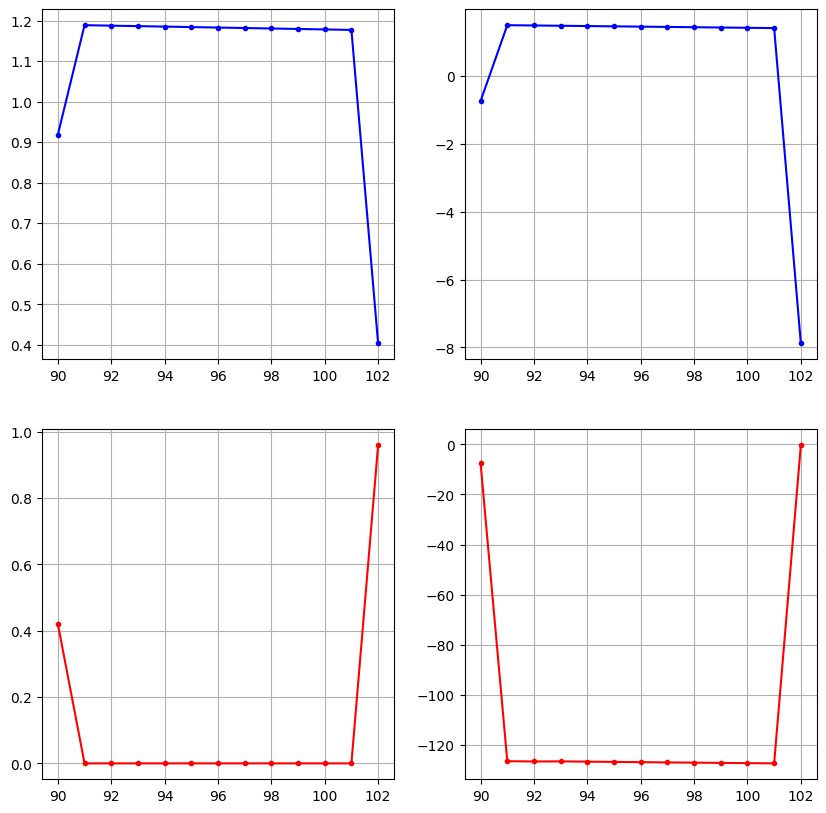

In [43]:
lengths_found = res.x.tolist()
print('final lengths:',lengths_found)
full_net_optimized = myrfTWA.get_fullant_given_lengths_from_internal_datatable(lengths_found, symetric_mode=True) #TODO: make true

S11_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')
S21_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')

for i in range(S11_array.shape[0]):
    S11, S21 = myrfTWA.get_full_TWA_network_S11_S21(fullnet=full_net_optimized, f=myrfTWA.freqs_for_fullant[i])
    S11_array[i] = S11
    S21_array[i] = S21

S11_mag_array = np.zeros_like(S11_array)
S11_db_array = np.zeros_like(S11_array)

S21_mag_array = np.zeros_like(S11_array)
S21_db_array = np.zeros_like(S11_array)


for i in range(S11_array.shape[0]):
    S11_mag_array[i] = np.abs(S11_array[i])
    S11_db_array[i] = 20*np.log10(S11_mag_array[i])
    S21_mag_array[i] = np.abs(S21_array[i])
    S21_db_array[i] = 20*np.log10(S21_mag_array[i])

fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(myrfTWA.freqs_for_fullant, S11_mag_array, marker='.', color='blue')
ax[0,1].plot(myrfTWA.freqs_for_fullant, S11_db_array, marker='.', color='blue')
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].plot(myrfTWA.freqs_for_fullant, S21_mag_array, marker='.', color='red')
ax[1,1].plot(myrfTWA.freqs_for_fullant, S21_db_array, marker='.', color='red')
ax[1,0].grid()
ax[1,1].grid()

In [44]:
# now trying differential evolution with the pure capacitor model 

bounds = [(5.3656e-12, 60e-12)]*5
freq_bounds = (93, 98)
s11cutoff = -35

res2 = myrfTWA.run_differential_evolution_global_op_explicitC(bounds,
                                            S11_db_cutouff=s11cutoff,
                                            freq_bounds=freq_bounds,
                                            strategy='best1bin',
                                            symetric_mode=True,
                                            one_cap_type_mode=False)

----------------------------------------
i_iter = 1
New simulation.
Point is: [1.53593178e-11 3.88414249e-11 3.17921689e-11 2.49508812e-11
 4.55131112e-11]
Average absolute error is : 7.32e+03
----------------------------------------
i_iter = 2
New simulation.
Point is: [3.98872599e-11 1.64189151e-11 5.48271129e-11 3.96805641e-11
 1.52887497e-11]
Average absolute error is : 7.17e+03
----------------------------------------
i_iter = 3
New simulation.
Point is: [4.18112526e-11 4.67106081e-11 4.14460629e-11 5.96674438e-11
 2.55891430e-11]
Average absolute error is : 7.33e+03
----------------------------------------
i_iter = 4
New simulation.
Point is: [8.30933744e-12 5.07229565e-11 5.95517026e-11 3.94438566e-11
 4.14817101e-11]
Average absolute error is : 7.38e+03
----------------------------------------
i_iter = 5
New simulation.
Point is: [1.57090581e-11 4.08132541e-11 3.94231399e-11 3.19950466e-11
 2.96909871e-11]
Average absolute error is : 6.73e+03
-----------------------------------

final Cs: [46.0618196  31.43480561 17.30284173 25.800016   13.51218518] pF


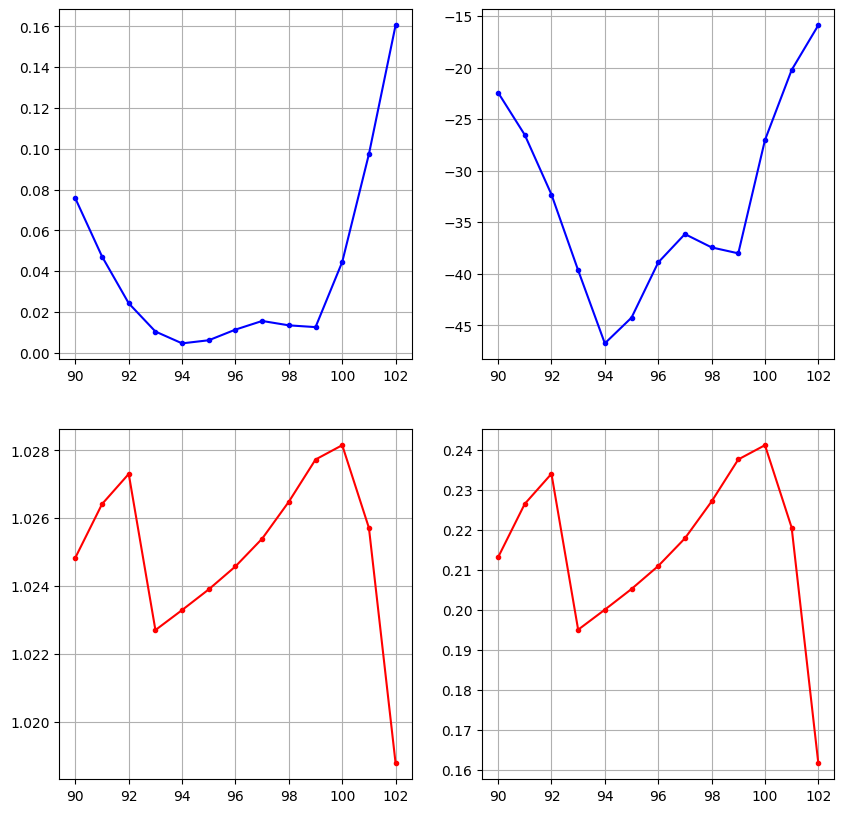

In [45]:
Cs_found = res2.x.tolist()
#Cs_found = [42.59722182, 28.77599259, 21.77324347, 29.38619356, 31.11430196]
print('final Cs:', np.array(Cs_found)*1e12, 'pF')
full_net_optimized = myrfTWA.get_fullant_given_Cs_via_caps_from_internal_datatable(Cs_found, symetric_mode=True) #TODO: make true

S11_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')
S21_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')

for i in range(S11_array.shape[0]):
    S11, S21 = myrfTWA.get_full_TWA_network_S11_S21(fullnet=full_net_optimized, f=myrfTWA.freqs_for_fullant[i])
    S11_array[i] = S11
    S21_array[i] = S21

S11_mag_array = np.zeros_like(S11_array)
S11_db_array = np.zeros_like(S11_array)

S21_mag_array = np.zeros_like(S11_array)
S21_db_array = np.zeros_like(S11_array)


for i in range(S11_array.shape[0]):
    S11_mag_array[i] = np.abs(S11_array[i])
    S11_db_array[i] = 20*np.log10(S11_mag_array[i])
    S21_mag_array[i] = np.abs(S21_array[i])
    S21_db_array[i] = 20*np.log10(S21_mag_array[i])

fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(myrfTWA.freqs_for_fullant, S11_mag_array, marker='.', color='blue')
ax[0,1].plot(myrfTWA.freqs_for_fullant, S11_db_array, marker='.', color='blue')
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].plot(myrfTWA.freqs_for_fullant, S21_mag_array, marker='.', color='red')
ax[1,1].plot(myrfTWA.freqs_for_fullant, S21_db_array, marker='.', color='red')
ax[1,0].grid()
ax[1,1].grid()

In [ ]:
fnew = np.arange(70, 130, 1)
lengths = [0.09448114887934068, 0.07859736105346576, 0.022027686868545192, 0.06756097433003318, 0.03393334980714666]
myrfTWA.plot_S11_S21_v_f_using_caps_to_increase_f_range(lengths,
                                                        new_f_range=fnew,
                                                        f0=96,
                                                        symetric_mode=True,
                                                        one_cap_type_mode=False)